4.859438918125604 -0.998995329320431


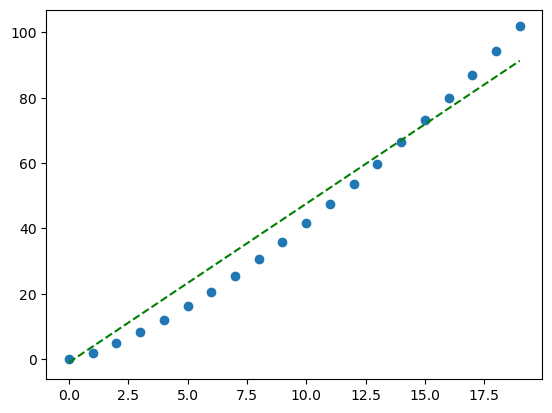

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# x_train = np.array([1,2,4,6]) 
# y_train = np.array([5,7,9,25])

x_train = np.arange(0, 20, 1)
y_train = x_train**1.5 + x_train

# x_train = np.array([5,8,9,13,15])
# y_train = np.array([30,50,60,90,130])
def piandao(x,y,w,b):
    m = x.shape[0]
    dw = 0.0
    db = 0.0
    for i in range(m):
        dw += (w*x[i]+b-y[i])*x[i]
        db += (w*x[i]+b-y[i])
    dw = dw/m
    db = db/m
    return dw,db



def tidu(x,y,w,b,aph,time):
    for i in range(time):
        dw,db = piandao(x,y,w,b)
        w = w - aph*dw
        b = b - aph*db
    return w,b

w = 0.0 ; b = 0.0 ; aph = 1e-5 ; time = 60000
fw,fb = tidu(x_train,y_train,w,b,aph,time)

print(fw,fb)

plt.plot(x_train,fw*x_train+fb,linestyle= '--',c='g')
plt.scatter(x_train,y_train)
plt.show()

1.0066560356465777 0.48377975549028107


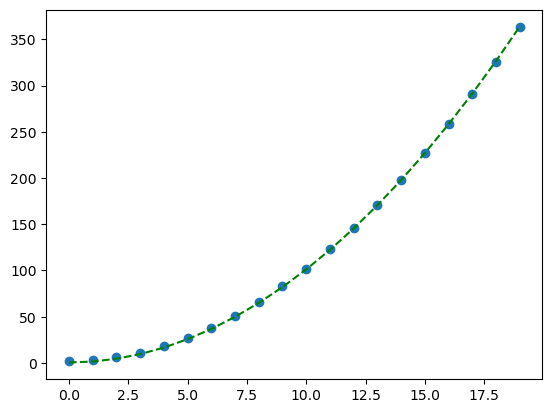

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.arange(0, 20, 1)
y_train = x_train**2 + 2


x = x_train**2

# x_train = np.array([5,8,9,13,15])
# y_train = np.array([30,50,60,90,130])
def piandao(x,y,w,b):
    m = x.shape[0]
    dw = 0.0
    db = 0.0
    for i in range(m):
        dw += (w*x[i]+b-y[i])*x[i]
        db += (w*x[i]+b-y[i])
    dw = dw/m
    db = db/m
    return dw,db



def tidu(x,y,w,b,aph,time):
    for i in range(time):
        dw,db = piandao(x,y,w,b)
        w = w - aph*dw
        b = b - aph*db
    return w,b

w = 0.0 ; b = 0.0 ; aph = 1e-5 ; time = 60000
fw,fb = tidu(x,y_train,w,b,aph,time)

print(fw,fb)

plt.plot(x_train,fw*x+fb,linestyle= '--',c='g')
plt.scatter(x_train,y_train)
plt.show()

In [26]:
import numpy as np    
np.set_printoptions(precision=2)    
from sklearn.linear_model import SGDRegressor    
from sklearn.preprocessing import StandardScaler    
import matplotlib.pyplot as plt    
    
# 生成训练数据    
x_train = np.arange(0, 20, 1)    
y_train = x_train**1.5 + x_train    
x = np.c_[x_train, x_train**2]  # 添加 x_train 的平方作为第二个特征  
  
# 数据归一化  
scaler = StandardScaler()  
x_norm = scaler.fit_transform(x)  
  
# 训练 SGDRegressor  
sgdr = SGDRegressor(max_iter=1000)  
sgdr.fit(x_norm, y_train)  
  
# 获取模型参数  
b_norm = sgdr.intercept_  
w_norm = sgdr.coef_  
  
# 注意：这里我们不需要将 w_norm 转换为二维数组，因为它已经是二维的（由于 x 是二维的）  
print(w_norm)  
print(b_norm)  
  
# 由于我们使用的是归一化后的特征，我们可以直接用它们来绘制回归线（但请注意这不是标准的做法）  
x_norm_for_plot = np.linspace(x_norm.min(), x_norm.max(), 100).reshape(-1, 2)  # 创建一些归一化后的点用于绘图  
y_pred_norm = w_norm.dot(x_norm_for_plot.T) + b_norm  # 注意这里使用 .T 来转置 x_norm_for_plot  
  
# 由于 x_norm_for_plot 是归一化的，我们不会直接用它来绘制 x 轴  
# 但我们可以绘制回归线（注意这不是在原始尺度上的）  
plt.plot(x_norm_for_plot[:, 0], x_norm_for_plot[:, 0]@w_norm, linestyle='--', c='g')  
plt.scatter(x_norm[:, 0], y_train, c='b')  # 这里也是，我们实际上不应该在归一化后的 x 上绘制原始 y  
plt.show()  
  
# 注意：上面的绘图并不是很有用，因为它在归一化后的尺度上绘制了数据和回归线  
# 如果您想在原始尺度上绘制，您需要找到一种方法将归一化后的 y_pred_norm 转换回原始尺度  
# 但这通常很复杂，因为归一化是特征空间的转换，而不是目标空间的转换

[16.21 15.82]
[42.91]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 50)